# Challenge Telecom X Parte 2

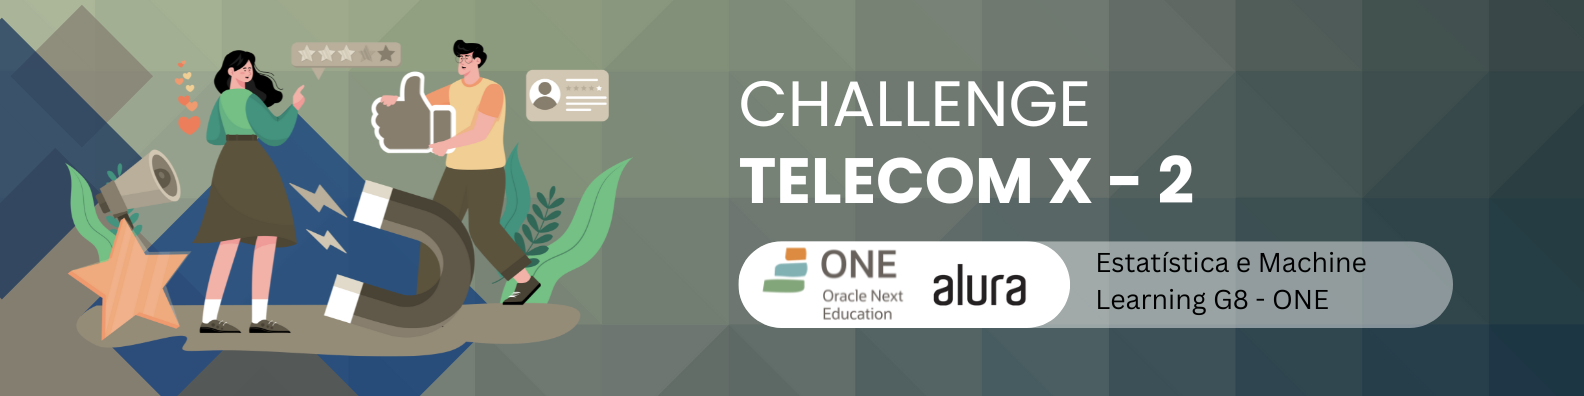

## Telecom X – Parte 2: Prevendo Churn

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem. Por isso, serão desenvolvidos modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

### Objetivos do Desafio:
- Preparar os dados para a modelagem (tratamento, encoding, normalização).
- Realizar análise de correlação e seleção de variáveis.
- Treinar dois ou mais modelos de classificação.
- Avaliar o desempenho dos modelos com métricas.
- Interpretar os resultados, incluindo a importância das variáveis.
- Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

### O que está sendo praticado:
- Pré-processamento de dados para Machine Learning
- Construção e avaliação de modelos preditivos
- Interpretação dos resultados e entrega de insights
- Comunicação técnica com foco estratégico

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Extração de Dados

In [34]:
df = pd.read_csv('dados_telecomx.csv')

In [35]:
df.head()

,customerID,Churn,Sexo,Idoso,Parceiro,Dependentes,Meses Contrato,Servico Telefonico,Multiplas Linhas,Servico Internet,...,Protecao Dispositivo,Suporte Tecnico,Streaming TV,Streaming Filmes,Tipo Contrato,Fatura Online,Forma Pagamento,Mensalidade,Gasto Total,Contas Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7043 non-null   object 
 1   Churn                 7043 non-null   int64  
 2   Sexo                  7043 non-null   object 
 3   Idoso                 7043 non-null   int64  
 4   Parceiro              7043 non-null   int64  
 5   Dependentes           7043 non-null   int64  
 6   Meses Contrato        7043 non-null   int64  
 7   Servico Telefonico    7043 non-null   int64  
 8   Multiplas Linhas      7043 non-null   object 
 9   Servico Internet      7043 non-null   object 
 10  Seguranca Online      7043 non-null   object 
 11  Backup Online         7043 non-null   object 
 12  Protecao Dispositivo  7043 non-null   object 
 13  Suporte Tecnico       7043 non-null   object 
 14  Streaming TV          7043 non-null   object 
 15  Streaming Filmes     

## Remoção de Colunas

Algumas colunas do dataset não trazem valor para a análise ou para os modelos preditivos. Isso não ajuda na previsão da evasão e pode até prejudicar o desempenho dos modelos, por isso, iremos removê-las.

Será removida a coluna customersID, porque é um valor único para cada cliente e não tem valor preditivo. Além disso, será removida também a colunas Contas Diária, porque tanto ela como Mensalidade já expressam o mesmo valor preditivo, se tornando uma informação redundante e que pode atrapalhar o treinamento do modelo.

In [37]:
df.columns

Index(['customerID', 'Churn', 'Sexo', 'Idoso', 'Parceiro', 'Dependentes',
       'Meses Contrato', 'Servico Telefonico', 'Multiplas Linhas',
       'Servico Internet', 'Seguranca Online', 'Backup Online',
       'Protecao Dispositivo', 'Suporte Tecnico', 'Streaming TV',
       'Streaming Filmes', 'Tipo Contrato', 'Fatura Online', 'Forma Pagamento',
       'Mensalidade', 'Gasto Total', 'Contas Diarias'],
      dtype='object')

In [38]:
df_final = df.drop(columns=["customerID", "Contas Diarias"], axis=1)

In [39]:
df_final.head()

,Churn,Sexo,Idoso,Parceiro,Dependentes,Meses Contrato,Servico Telefonico,Multiplas Linhas,Servico Internet,Seguranca Online,Backup Online,Protecao Dispositivo,Suporte Tecnico,Streaming TV,Streaming Filmes,Tipo Contrato,Fatura Online,Forma Pagamento,Mensalidade,Gasto Total
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


## Separando as variáveis

Será separado as variáveis explicativas da variável alvo. Em seguida, será separada as variáveis explicativas numéricas das variáveis explicativas categóricas e, por fim, será dividido os dados de treino e teste antes do pré-processamento.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

In [42]:
colunas_numericas = X.select_dtypes(include=np.number).columns.tolist()
colunas_categoricas = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Colunas Categóricas:", list(colunas_categoricas))
print("Colunas Numéricas:", colunas_numericas)

Colunas Categóricas: ['Sexo', 'Multiplas Linhas', 'Servico Internet', 'Seguranca Online', 'Backup Online', 'Protecao Dispositivo', 'Suporte Tecnico', 'Streaming TV', 'Streaming Filmes', 'Tipo Contrato', 'Forma Pagamento']
Colunas Numéricas: ['Idoso', 'Parceiro', 'Dependentes', 'Meses Contrato', 'Servico Telefonico', 'Fatura Online', 'Mensalidade', 'Gasto Total']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Encoding

Modelos de machine learning exigem que todas as variáveis de entrada sejam numéricas. Por isso, será feito um pré-processamento utilizando o método One-Hot Encoding para colunas categóricas e o Standard Scaler para colunas numéricas.

In [44]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [45]:
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, colunas_numericas),
        ('cat', encoder, colunas_categoricas)
    ],
    remainder='passthrough'
)

In [47]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Balanceamento

Antes de seguirmos para o treinamento dos modelos de fato, será verificado se o dataset está desbalanceado ou não ao ver a proporção dos clientes que evadiram e os que não evadiram.

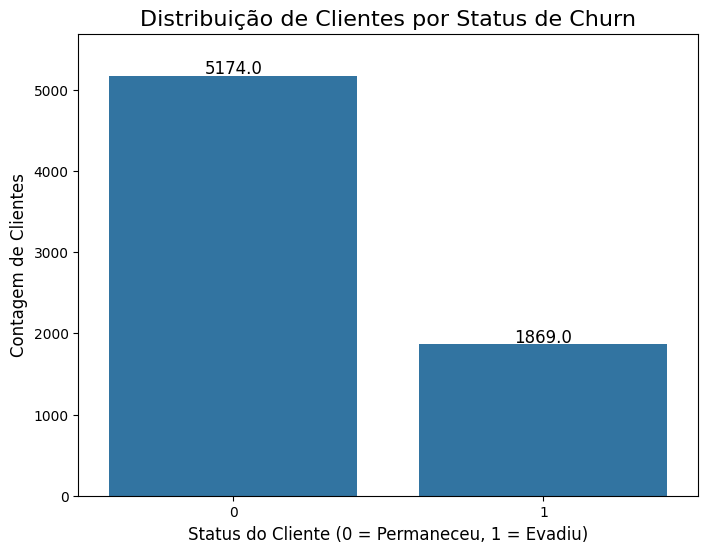

In [48]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x=df['Churn'].astype('str'))
plt.title('Distribuição de Clientes por Status de Churn', fontsize=16)
plt.xlabel('Status do Cliente (0 = Permaneceu, 1 = Evadiu)', fontsize=12)
plt.ylabel('Contagem de Clientes', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                fontsize=12,
                color='black',
                xytext=(0, 5),
                textcoords='offset points')

plt.ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)
plt.show()

Como podemos perceber pelo gráfico, esse dataset está desbalanceado. Será aplicado SMOTE para balancear os dados de treino pré-processados.

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

In [51]:
print("Dimensões do X_train após processamento e reamostragem:", X_train_resampled.shape)
print("Dimensões do X_test após processamento:", X_test_processed.shape)
print("\nDistribuição de classes após o SMOTE (treino):")
print(y_train_resampled.value_counts())

Dimensões do X_train após processamento e reamostragem: (8278, 30)
Dimensões do X_test após processamento: (1409, 30)

Distribuição de classes após o SMOTE (treino):
Churn
0    4139
1    4139
Name: count, dtype: int64


## Análise de Correlação

 Vamos criar a matriz de correlação para identificar relações entre variáveis numéricas e, com isso, retirar alguns insights valiosos para entendermos o dataset.

In [52]:
colunas_numericas = df_final.select_dtypes(include=['number'])

In [53]:
correlation_matrix = colunas_numericas.corr()

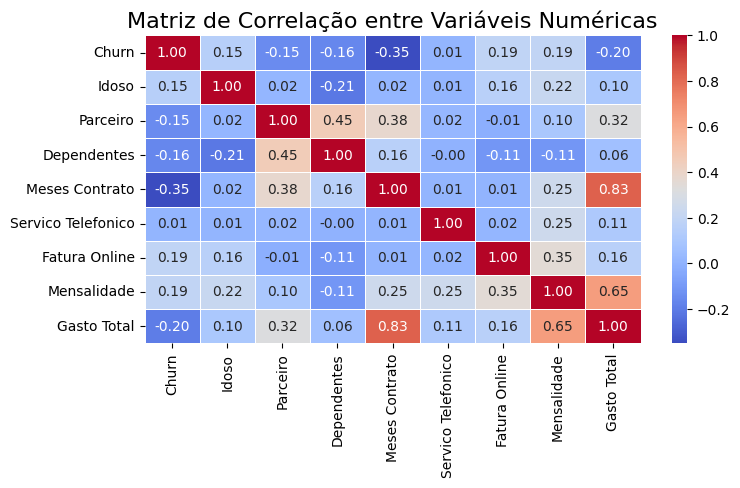

In [55]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
plt.show()

**Desse gráfico de correlação, podemos reitrar os seguintes insigths:**

Meses Contrato vs. Churn:
- Esta é a correlação negativa mais forte com a evasão. Isso significa que quanto maior o número de meses de contrato de um cliente, menor é a sua probabilidade de cancelar. Este é o principal fator de retenção visível nos dados.

Mensalidade vs. Churn:
- Existe uma correlação positiva. Isso indica que clientes com mensalidades mais altas têm uma tendência maior a cancelar o serviço. O preço mensal é, portanto, um fator de risco.

Em resumo, o gráfico revela de forma muito clara a dinâmica principal do negócio: a retenção está fortemente ligada à longevidade do cliente (Meses Contrato), enquanto o risco de evasão está associado ao custo mensal (Mensalidade). Essa visualização inicial já aponta quais variáveis serão provavelmente as mais importantes para o modelo preditivo.

Além disso, percebe-se que há uma forte relação entre gasto total e meses contrato, o que é lógico já que quanto mais tempo alguém é cliente, maior será seu gasto total acumulado.

## Análise Direcionada

Agora, vamos analisar a relação entre:

- Tempo de contrato × Evasão
- Total gasto × Evasão

Para isso, utilizaremos boxplots.

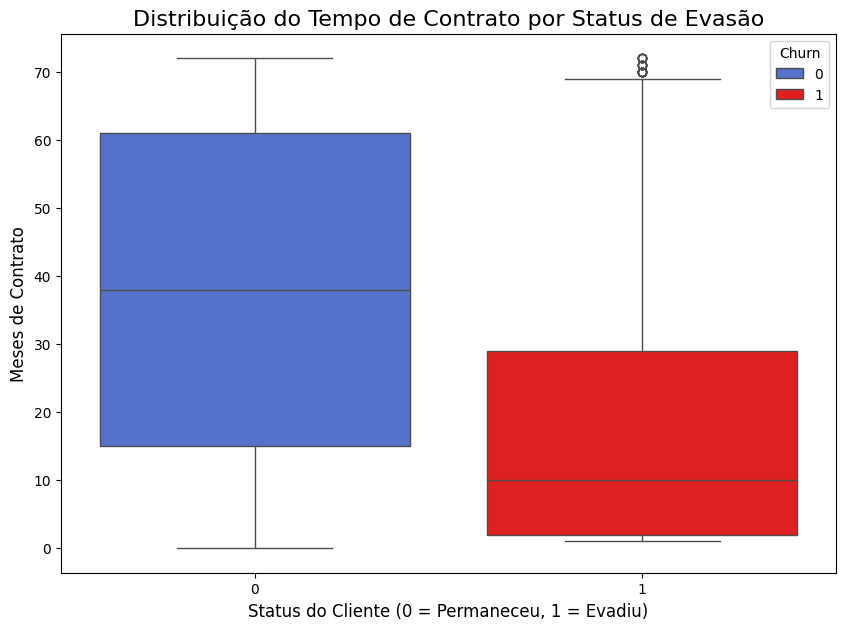

In [72]:
plt.figure(figsize=(10, 7))

sns.boxplot(
    x='Churn',
    y='Meses Contrato',
    data=df,
    palette={0: "royalblue", 1: "red"},
    hue='Churn'
)

plt.title('Distribuição do Tempo de Contrato por Status de Evasão', fontsize=16)
plt.xlabel('Status do Cliente (0 = Permaneceu, 1 = Evadiu)', fontsize=12)
plt.ylabel('Meses de Contrato', fontsize=12)
plt.show()

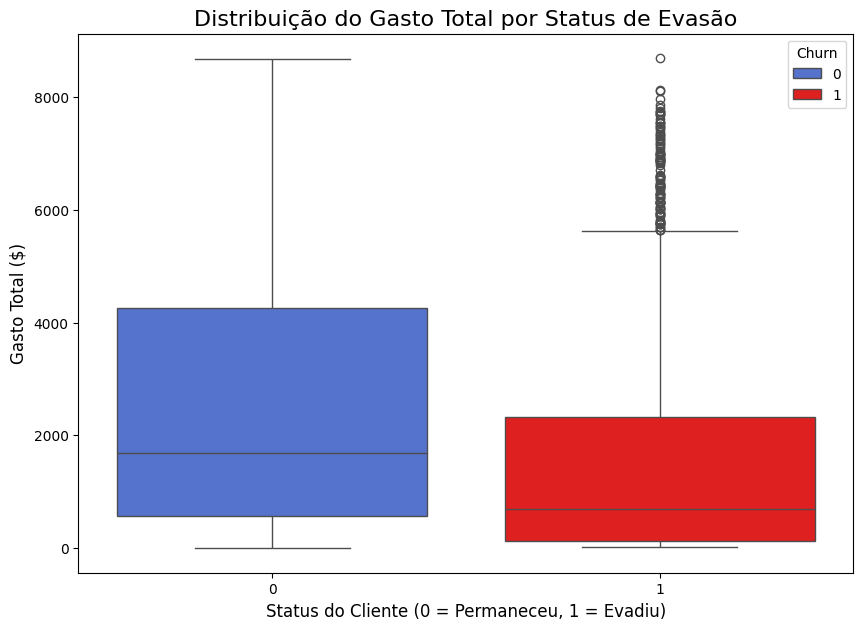

In [73]:
plt.figure(figsize=(10, 7))

sns.boxplot(
    x='Churn',
    y='Gasto Total',
    data=df,
    palette={0: "royalblue", 1: "red"},
    hue='Churn'
)

plt.title('Distribuição do Gasto Total por Status de Evasão', fontsize=16)
plt.xlabel('Status do Cliente (0 = Permaneceu, 1 = Evadiu)', fontsize=12)
plt.ylabel('Gasto Total ($)', fontsize=12)
plt.show()

A partir dos gráficos, podemos chegar na seguinte conclusão:

- **Tempo de Contrato vs. Evasão:** A distribuição interquartil dos clientes que evadiram (Churn = 1) está concentrada em valores muito baixos de Meses Contrato. A mediana está em torno de 10 meses para quem sai, enquanto para quem fica, está acima de 40 meses. Isso reforça que clientes recentes estão em altíssimo risco de churn.

- **Gasto Total vs. Evasão:** Os clientes que permanecem (Churn = 0) têm uma mediana de Gasto Total significativamente mais alta. Isso faz sentido, pois o gasto total está diretamente ligado ao tempo de contrato. Clientes mais antigos naturalmente gastaram mais no total e, como vimos, são mais leais.

## Criação e Avaliação dos Modelos

Antes de treinarmos os modelos, vamos criar uma função para avaliá-los. Em seguida, será construído o modelo de Regressão Lógística e Random Forest

**Por que utilizar esses modelos?**

- **Regressão Logística:** utilizarei esse modelo porque é um modelo linear, simples, rápido de treinar e muito interpretável. Ele serve como uma excelente linha de base. Se um modelo mais complexo não apresentar um ganho de performance significativo, a simplicidade da Regressão Logística pode ser preferível. Além disso, seus coeficientes podem ser facilmente interpretados para entender o impacto de cada variável na probabilidade de churn, o que gera insights valiosos para o negócio.

- **Random Forest:** utilizarei esse modelo porque é um modelo baseado em árvores de decisão que consegue capturar relações complexas e não-lineares nos dados, algo que a Regressão Logística não consegue. Geralmente, isso resulta em maior acurácia. Além disso, ele é menos sensível a outliers e a combinação de várias árvores também o torna mais robusto a overfitting do que uma única árvore de decisão.

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [76]:
def avaliar_modelo(nome_modelo, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"--- Métricas de Avaliação: {nome_modelo} ---")
    print(f"Acurácia: {acc:.4f}, Precisão: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}\n")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.show()

### 1. Regressão Logística

Treinando o modelo de regressão logística

In [79]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

Avaliando o modelo de regressão logística

--- Métricas de Avaliação: Regressão Logística ---
Acurácia: 0.7523, Precisão: 0.5220, Recall: 0.7914, F1-Score: 0.6291

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.75      0.76      1409



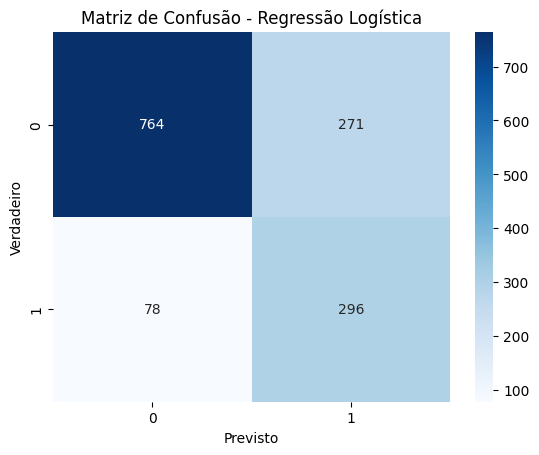

In [80]:
y_pred_lr = log_reg.predict(X_test_processed)
avaliar_modelo("Regressão Logística", y_test, y_pred_lr)

### 2. Random Forest

Treinando o modelo de Random Forest

In [81]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=150, n_jobs=-1)
random_forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)

Avaliando o modelo de Random Forest

--- Métricas de Avaliação: Random Forest ---
Acurácia: 0.7871, Precisão: 0.6022, Recall: 0.5829, F1-Score: 0.5924

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1035
           1       0.60      0.58      0.59       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.79      1409



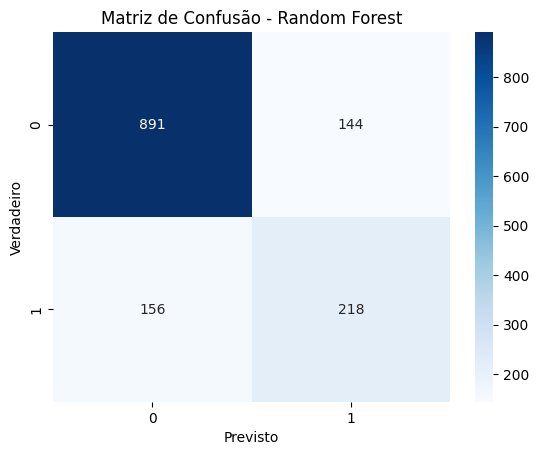

In [82]:
y_pred_rf = random_forest.predict(X_test_processed)
avaliar_modelo("Random Forest", y_test, y_pred_rf)

### **Avaliando no conjunto de treino para verificar overfitting/underfitting**

--- Avaliação no Conjunto de Treino ---
--- Métricas de Avaliação: Regressão Logística (Treino) ---
Acurácia: 0.7818, Precisão: 0.7587, Recall: 0.8265, F1-Score: 0.7912

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      4139
           1       0.76      0.83      0.79      4139

    accuracy                           0.78      8278
   macro avg       0.78      0.78      0.78      8278
weighted avg       0.78      0.78      0.78      8278



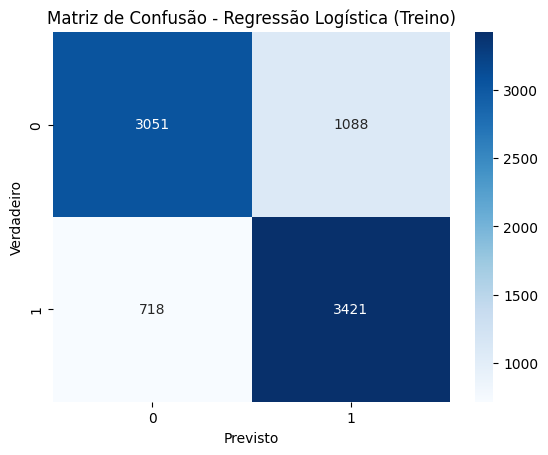

--- Métricas de Avaliação: Random Forest (Treino) ---
Acurácia: 0.9984, Precisão: 0.9978, Recall: 0.9990, F1-Score: 0.9984

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      1.00      1.00      4139

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278



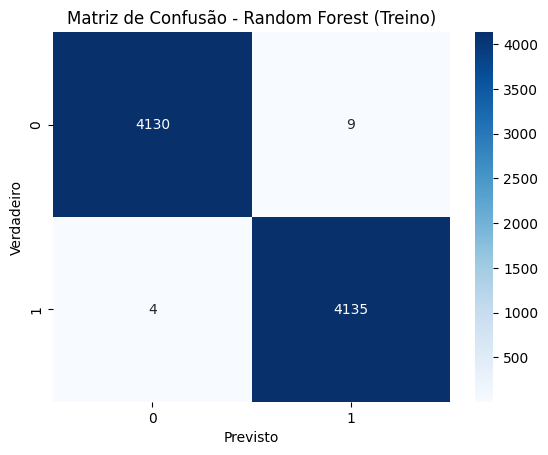

In [85]:
print("--- Avaliação no Conjunto de Treino ---")

# Regressão Logística
y_pred_train_lr = log_reg.predict(X_train_resampled)
avaliar_modelo("Regressão Logística (Treino)", y_train_resampled, y_pred_train_lr)

# Random Forest
y_pred_train_rf = random_forest.predict(X_train_resampled)
avaliar_modelo("Random Forest (Treino)", y_train_resampled, y_pred_train_rf)

- **Modelo de Regressão Linear**: teve uma performance boa nos dados de treino (Acurácia de 78.18%) e uma performance ligeiramente inferior, mas muito próxima, nos dados de teste (Acurácia de 75.23%). Não há uma queda drástica, indicando que o modelo não está sofrendo de overfitting significativo. Além disso, como seu desempenho é razoável, também não podemos classificá-lo como um caso grave de underfitting. Ele parece ter um ajuste adequado para sua complexidade.

- **Modelo de Random Forest**: O modelo de Random Forest apresentou um desempenho praticamente perfeito nos dados de treino (Acurácia de 99.84%), mas essa performance caiu significativamente no conjunto de teste (Acurácia de 78.71%). Essa grande diferença entre o desempenho de treino e teste é a definição clássica de overfitting. Isso pode ter ocorrido devido a alta complexidade do modelo que cria árvores de decisão muito profundas, permitindo que o modelo "decore" os padrões e até mesmo o ruído dos dados de treino, incluindo os dados sintéticos gerados pelo SMOTE. Para isso, poderíamos limitar a complexidade modificando os hiperparâmetros do modelo.

### **Análise comparativa dos modelos**

De acordo com as métricas dos dois modelos, podemos chegar à seguinte conclusão:

- Regressão Logística: Apresenta um Recall superior (~79.14%), sendo excelente para identificar o máximo de clientes em risco.
- Random Forest: Apresenta uma Precisão e Acurácia geral ligeiramente melhores, mas com um Recall menor (~58.29%). Além disso, está apresentando overfitting.

Nessas condições, o modelo de Regressão Logística é preferível para uma estratégia de retenção abrangente que visa minimizar a perda de clientes, visto que seu recall é maior.

## Importância das Variáveis

Vamos investigar quais variáveis os nossos modelos consideraram mais importantes para prever o churn.

### 1. Regressão Logística

/tmp/ipython-input-712411848.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variável', data=coefs_df.head(15), palette='viridis')


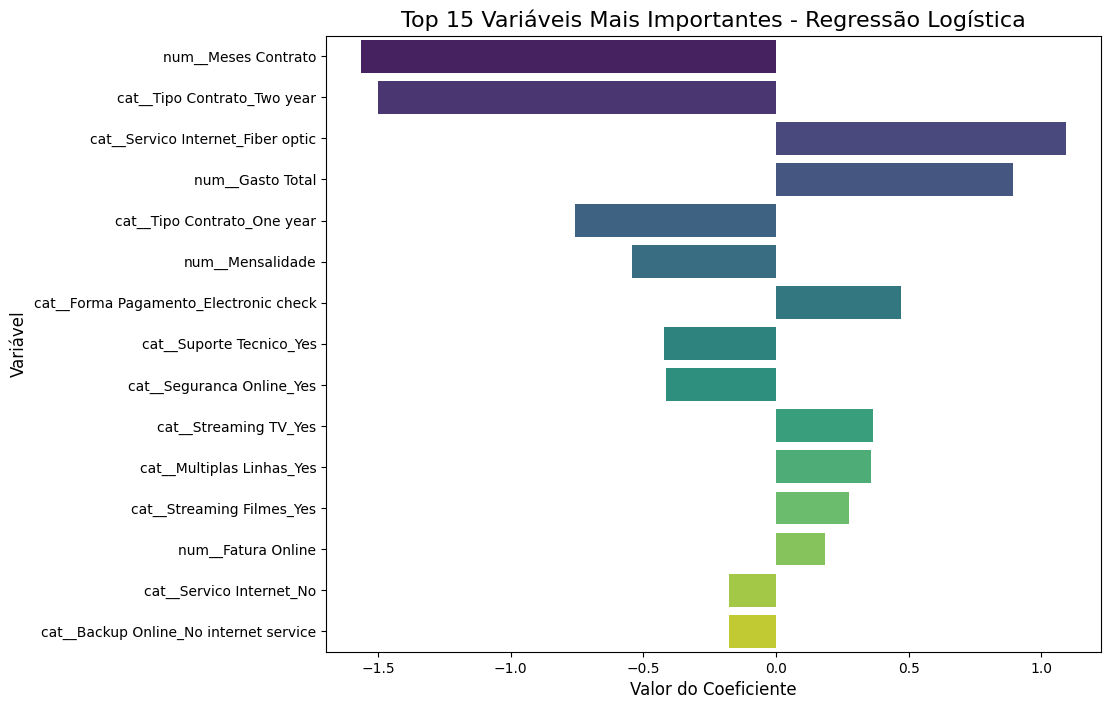

In [88]:
feature_names = preprocessor.get_feature_names_out()

log_reg_coefs = log_reg.coef_[0]

coefs_df = pd.DataFrame({
    'Variável': feature_names,
    'Coeficiente': log_reg_coefs
})

coefs_df['Importância'] = np.abs(coefs_df['Coeficiente'])
coefs_df = coefs_df.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coeficiente', y='Variável', data=coefs_df.head(15), palette='viridis')
plt.title('Top 15 Variáveis Mais Importantes - Regressão Logística', fontsize=16)
plt.xlabel('Valor do Coeficiente', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.show()

Este gráfico mostrará as variáveis que mais pesam na decisão do modelo. Variáveis com barras para a direita (positivas) são as que mais contribuem para o churn, enquanto as com barras para a esquerda (negativas) são as que mais contribuem para a retenção dos clientes.

### 2. Random Forest

/tmp/ipython-input-4293131667.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Variável', data=importances_df.head(15), palette='plasma')


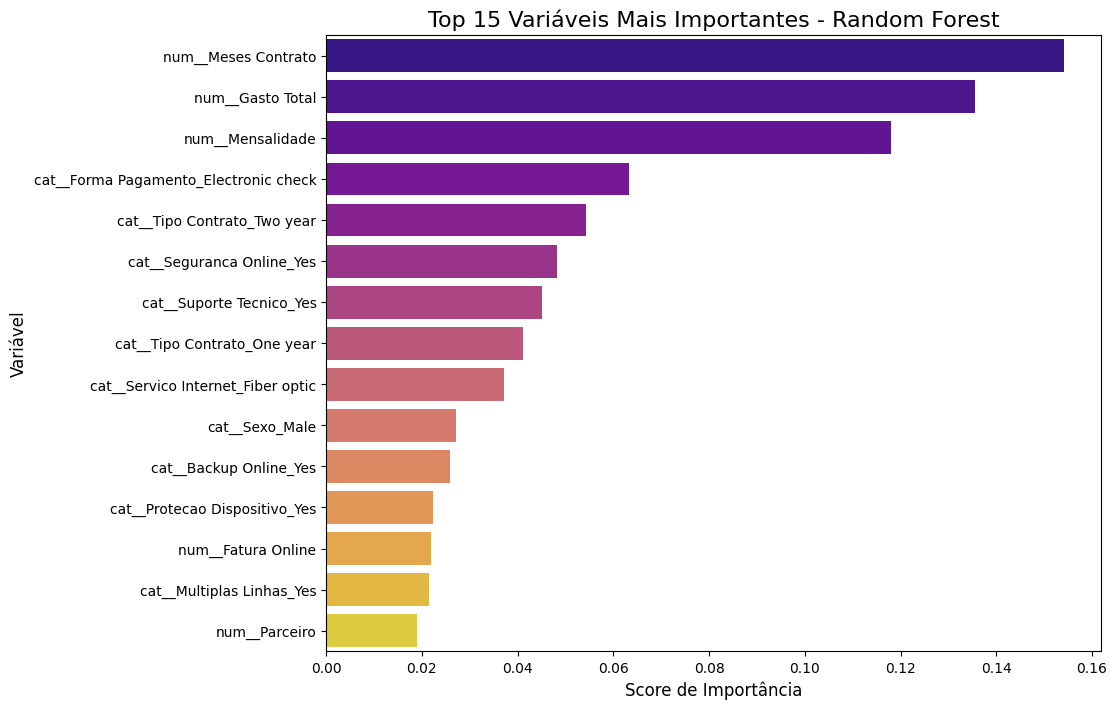

In [90]:
rf_importances = best_rf_random.feature_importances_

importances_df = pd.DataFrame({
    'Variável': feature_names,
    'Importância': rf_importances
})

importances_df = importances_df.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importância', y='Variável', data=importances_df.head(15), palette='plasma')
plt.title('Top 15 Variáveis Mais Importantes - Random Forest', fontsize=16)
plt.xlabel('Score de Importância', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.show()

Este gráfico mostra as variáveis que o modelo mais utilizou para tomar suas decisões.

# Conclusão

## Relatório de Análise de Evasão de Clientes (Churn)



---



### Introdução e Objetivo:
Este relatório apresenta uma análise dos fatores que levam à evasão de clientes (churn) na empresa de telecomunicações TelecomX. O objetivo principal é identificar as variáveis de maior impacto na decisão de um cliente cancelar seu serviço, com base nos dados fornecidos e nos modelos de machine learning desenvolvidos no notebook. A partir dessa análise, serão propostas estratégias de retenção data-driven para mitigar os riscos e aumentar a fidelidade dos clientes.



---



### Metodologia de Análise
A análise seguiu uma metodologia estruturada, conforme detalhado no notebook, que incluiu as seguintes etapas:

*   **Pré-processamento de Dados**: As colunas customerID (identificador único sem valor preditivo) e Contas Diarias (redundante com a Mensalidade) foram removidas. As variáveis foram então separadas em numéricas e categóricas, sendo as numéricas padronizadas (StandardScaler) e as categóricas convertidas em formato numérico (OneHotEncoder).
*   **Balanceamento de Dados**: Foi identificado um forte desbalanceamento na variável alvo Churn, com um número muito maior de clientes que permaneceram do que de clientes que evadiram. Para corrigir isso e evitar que os modelos fossem enviesados, foi aplicada a técnica SMOTE apenas no conjunto de treino, garantindo um aprendizado mais justo e eficaz.
*   **Modelagem e Avaliação**: Foram treinados e avaliados dois modelos de classificação para prever a evasão:
    * Regressão Logística: Um modelo linear, rápido e altamente interpretável.
    * Random Forest: Um modelo de conjunto (ensemble) mais complexo, capaz de capturar relações não-lineares.
*   A avaliação foi realizada utilizando métricas como Acurácia, Precisão, Recall e F1-Score, além da análise da Matriz de Confusão.




---



### Análise e Resultados

#### Principais Fatores que Influenciam a Evasão:
A análise exploratória e a avaliação dos modelos revelaram de forma consistente os três principais fatores que influenciam o churn:

* Tempo de Contrato (Meses Contrato): É o fator de retenção mais forte. A análise de correlação mostrou uma relação negativa significativa (-0.35) com o churn.

* Custo Mensal (Mensalidade): É um fator de risco de evasão relevante. A correlação positiva (0.19) indica que mensalidades mais altas aumentam a probabilidade de o cliente cancelar.

* Tipo de Contrato e Serviços Adicionais: Clientes com contratos mensais (Month-to-month) e que assinam serviços como Internet de Fibra Óptica (que geralmente tem um custo maior) são significativamente mais propensos a evadir.

### Desempenho dos Modelos Preditivos
A avaliação dos modelos no conjunto de teste forneceu os seguintes insights:

| Modelo | Acurácia | Precisão (Churn=1) | Recall (Churn=1) | F1-Score (Churn=1) | Overfitting? |
| :--- | :---: | :---: | :---: | :---: | :---: |
| **Regressão Logística** | 75.23% | 52.20% | **79.14%** | 62.91% | Não |
| **Random Forest** | 78.71% | 60.22% | 58.29% | 59.24% | Sim |

* Regressão Logística: Este modelo, embora com precisão menor, demonstrou um excelente Recall (79,14%). Isso significa que ele foi capaz de identificar corretamente 79% dos clientes que de fato iriam evadir. Sua performance próxima entre treino e teste mostra que é um modelo robusto e confiável.

* Random Forest: Apesar de uma acurácia geral ligeiramente superior, seu desempenho foi comprometido por um forte overfitting (acurácia de 99.8% no treino vs. 78.7% no teste). Mais importante, seu Recall foi consideravelmente inferior (58,29%), o que o torna menos eficaz para a estratégia de negócio.

Para um problema de negócio como a previsão de churn, é mais custoso não identificar um cliente que vai sair (falso negativo) do que abordar um que não iria (falso positivo). Portanto, o Recall é a métrica mais importante. Com base nisso, o modelo de Regressão Logística é a melhor escolha, pois maximiza a identificação de clientes em risco, fornecendo uma base sólida para ações de retenção.



---

### Estratégias de Retenção Propostas

Com base nos fatores de risco identificados e no desempenho do modelo de Regressão Logística, as seguintes estratégias são recomendadas:

1. **Incentivo a Contratos de Longo Prazo:** O tempo de contrato é o principal fator de retenção e, por isso, criar campanhas ativas para migrar clientes de contratos mensais para planos anuais ou de dois anos. Oferecer benefícios claros, como descontos na mensalidade, upgrade de serviços ou bônus de fidelidade para quem aderir a contratos mais longos.
2. **Gestão de Preços e Percepção de Valor:**  Mensalidades altas, especialmente em planos de Fibra Óptica, aumentam o risco de churn. Por isso, desenvolver pacotes de serviços agregados. Para clientes de Fibra Óptica, oferecer pacotes que incluam "Suporte Técnico Premium" ou "Backup Online" por um valor adicional baixo. Isso aumenta a percepção de valor do serviço, tornando a decisão de cancelar mais difícil.
3. **Programa de Acompanhamento para Novos Clientes (Onboarding):** Clientes com poucos meses de contrato são os que apresentam maior risco. Por isso, implementar um programa de "onboarding" nos primeiros 3 a 6 meses. Este programa deve incluir contato proativo da equipe de sucesso do cliente para garantir que o serviço está funcionando bem, oferecer dicas de uso e apresentar ofertas de boas-vindas para serviços complementares, fortalecendo o relacionamento inicial.
4. **Uso do Modelo Preditivo para Ações Direcionadas:** O modelo de Regressão Logística identifica com alta sensibilidade (Recall) os clientes propensos a evadir. Por isso, utilizar o modelo para gerar uma lista semanal ou mensal de clientes com alta probabilidade de churn. Para esses clientes, aplicar de forma direcionada as estratégias acima: ofertas personalizadas de migração de plano, pacotes de valor ou um contato proativo da equipe de retenção para entender suas dores e resolver possíveis problemas.

### Conclusão Final
A análise de dados e a modelagem preditiva foram eficazes em identificar que a baixa fidelidade (poucos meses de contrato) e o alto custo mensal são os principais impulsionadores da evasão de clientes na TelecomX. O modelo de Regressão Logística se mostrou uma ferramenta robusta e adequada para identificar proativamente os clientes em risco. A implementação das estratégias de retenção propostas, focadas em fidelização, gestão de valor e ações direcionadas, tem um alto potencial para reduzir as taxas de churn e fortalecer a base de clientes da empresa.
